# Which Debts Are worth the Bank's effort

## Introduction
- The project "Debts Are Worth the Bank's Effort" delves into the critical domain of debt management within financial institutions. 
- As the lifespan of economies, banks face immense challenges in assessing and recovering debts while maintaining financial stability. 
- This research aims to explore the strategies banks employ to evaluate debt worthiness, optimize recovery, and mitigate credit risks. 
- By analyzing credit risk models, economic influences, and regulatory compliance, the project seeks to uncover key factors that impact effective debt management. 
- Through a combination of qualitative and quantitative research, this study aspires to provide valuable insights for banks and regulatory bodies, fostering responsible lending practices and a resilient financial environment.

In [29]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#importing and reading the given data set
df=pd.read_csv(r'C:\Users\sandi\Technocolabs_Mini_Project\bank_data.csv')

In [31]:
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


## Basic Checks

In [32]:
df.head()#for top five rows

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [33]:
df.tail()#for last five rows

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


In [34]:
df.info()#for total number of rows nd columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [35]:
df.describe()#for statistical details

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


# Graphical exploratory data analysis

No handles with labels found to put in legend.


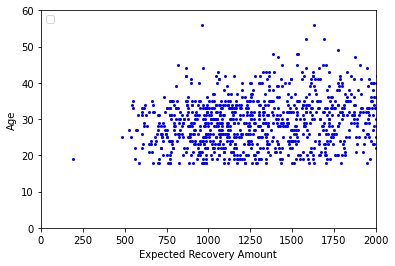

In [37]:
plt.scatter(x=df['expected_recovery_amount'],y=df['age'],c='b',s=4)
plt.xlim(0,2000)
plt.ylim(0,60)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Age")
plt.legend(loc=2)
plt.show()

# Statistical test: age vs. expected recovery amount

In [38]:
from scipy import stats
#compute average age just below and above the threshold
era_900_1100=df.loc[(df['expected_recovery_amount']<1100)&(df['expected_recovery_amount']>=900)]
by_recovery_strategy=era_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

#Perfor Kruskal_Wall is test
Level_0_age=era_900_1100.loc[df['recovery_strategy']=='Level 0 Recovery']['age']
Level_1_age=era_900_1100.loc[df['recovery_strategy']=='Level 1 Recovery']['age'] 
stats.kruskal(Level_0_age,Level_1_age)

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

# Statistical test: sex vs. expected recovery amount

In [39]:
#Number of customer in each category
crosstab=pd.crosstab(df.loc[(df['expected_recovery_amount']<1100)&
                     (df['expected_recovery_amount']>=900)]['recovery_strategy'],
                     df['sex'])
print(crosstab)
#Chi-square test
chi2_stat,p_val,dof,ex=stats.chi2_contingency(crosstab)
print(p_val)

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55
0.5377947810444592


# Exploratory graphical analysis: recovery amount

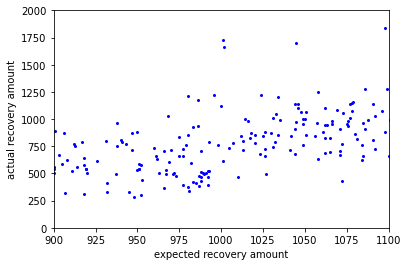

In [40]:
# Scatter plot of Actual Recovery Amount vs. Expected Recovery Amount
plt.scatter(x=df['expected_recovery_amount'],y=df['actual_recovery_amount'],c="b",s=4)
plt.xlim(900,1100)
plt.ylim(0,2000)
plt.xlabel("expected recovery amount")
plt.ylabel("actual recovery amount")

plt.show()

# Statistical analysis: recovery amount

In [41]:
import warnings

warnings.filterwarnings("ignore")
# to ignore the below warning

### what is kruskal will's test?
- Kruskal-Wallis test is a non-parametric statistical test used to compare the median ranks of three or more independent groups. - It determines whether there are significant differences between the distributions of the groups without assuming normality.      - This test is suitable for situations when the data is ordinal or not normally distributed.

In [42]:

# Compute average actual recovery amount just below and above the threshold
by_recovery_strategy['actual_recovery_amount'].describe().unstack()

#Perform Kruskal-Wallis test
Level_0_actual=era_900_1100[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual=era_900_1100[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
print(stats.kruskal(Level_0_actual,Level_1_actual))


#Repeat for smaller range of $950 to $1050
Level_0_actual=era_950_1050.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual=era_950_1050.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual,Level_1_actual)

KruskalResult(statistic=65.37966302528878, pvalue=6.177308752803109e-16)


KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

# Regression modeling: no threshold

In [44]:
#import statsmodel
import statsmodels.api as sm
#define X and Y
X= era_900_1100['expected_recovery_amount']
y=era_900_1100['actual_recovery_amount']
X=sm.add_constant(X)


#Build linear regression model
model=sm.OLS(y,X).fit()
predictions=model.predict(X)

#Print out the model summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           1.56e-13
Time:                            15:17:59   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression modeling: adding true threshold

In [54]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
df['indicator_1000'] = np.where(df['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = df.loc[(df['expected_recovery_amount']<1100) & 
                      (df['expected_recovery_amount']>=900)]

# Define X and y
X = era_900_1100['expected_recovery_amount']
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           1.56e-13
Time:                            15:36:36   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression modeling: adjusting the window

In [57]:
# Redefine era_950_1050 so the indicator variable is included
era_950_1050 = df.loc[(df['expected_recovery_amount']<1050) & 
                      (df['expected_recovery_amount']>=900)]

# Define X and y 
X = era_950_1050[['expected_recovery_amount','indicator_1000']]
y = era_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.290
Model:                                OLS   Adj. R-squared:                  0.279
Method:                     Least Squares   F-statistic:                     26.59
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           2.08e-10
Time:                            15:47:51   Log-Likelihood:                -921.43
No. Observations:                     133   AIC:                             1849.
Df Residuals:                         130   BIC:                             1858.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      365.7038    803.380      0.455      0.650   -1223.687    1955.095
expected_recovery_amount     0.2635      0.841      0.313      0.754      -1.400       1.927
indicator_1000             314.4866     76.007      4.138      0.000     164.116     464.857
==============================================================================
Omnibus:                       44.769   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.097
Skew:                           1.401   Prob(JB):                     1.84e-22
Kurtosis:                       6.195   Cond. No.                     3.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion 

- The project "Debts Are Worth the Bank's Effort" has provided valuable insights into the critical domain of debt management within financial institutions. 
- Through a thorough examination of debt worthiness assessment, recovery strategies, credit risk models, economic influences, and regulatory compliance, we have gained a comprehensive understanding of the complexities involved in managing debts effectively.
- Our findings highlight the significance of responsible lending practices and the need for banks to adapt to economic fluctuations to ensure long-term financial stability.
- The analysis of credit risk models underscores the importance of incorporating advanced machine learning techniques to enhance predictive capabilities.